In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('../csv-archivos/datos_sql.csv', index_col=0)
df

attrition business_travel  daily_rate              department  \
0         False             NaN       684.0                     NaN   
1         False             NaN       699.0                     NaN   
2         False          rarely       532.0  research & development   
3         False          rarely       359.0                     NaN   
4         False             NaN      1319.0                     NaN   
...         ...             ...         ...                     ...   
1608      False             NaN       498.0                     NaN   
1610      False              no       805.0                     NaN   
1611      False          rarely       903.0                     NaN   
1612      False              no      1229.0                     NaN   
1613      False             NaN       566.0                     NaN   

      distance_from_home  education   education_field  employee_number  \
0                      6          3               NaN            162.0   
1                      1          4     life sciences            259.0   
2                      4          2  technical degree            319.0   
3                      2          4           medical              NaN   
4                      3          3  technical degree              NaN   
...                  ...        ...               ...              ...   
1608                   3          4           medical            966.0   
1610                   4          2               NaN            972.0   
1611                  13          5               NaN              NaN   
1612                   8          4  technical degree            990.0   
1613                   7          2           medical              NaN   

      environment_satisfaction gender  ...  stock_option_level  \
0                          1.0      m  ...                   0   
1                          3.0      m  ...                   1   
2                          3.0      m  ...                   0   
3                          1.0      f  ...                   2   
4                          1.0      f  ...                   1   
...                        ...    ...  ...                 ...   
1608                       3.0      f  ...                   1   
1610                       3.0      m  ...                   0   
1611                       NaN      m  ...                   0   
1612                       1.0      m  ...                   2   
1613                       4.0      m  ...                   1   

      total_working_years  training_times_last_year work_life_balance  \
0                     NaN                         5               3.0   
1                    34.0                         5               3.0   
2                    22.0                         3               NaN   
3                     NaN                         2               NaN   
4                     NaN                         5               3.0   
...                   ...                       ...               ...   
1608                  8.0                         2               4.0   
1610                  NaN                         5               2.0   
1611                  9.0                         3               3.0   
1612                 12.0                         3               3.0   
1613                  NaN                         3               3.0   

      years_at_company years_since_last_promotion  years_with_current_manager  \
0                   20                         15                          15   
1                   33                         11                           9   
2                   22                         11                          15   
3                   20                          5                           6   
4                   19                          2                           8   
...                ...                        ...                         ...   
1608                 8     

In [7]:
def eda (dataframe):
    "Esta función hace un análisis exploratorio del dataframe que le pasemos"

    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    
    
    print("\n ..................... \n")
    print("Los valores que tenemos para las columnas categóricas son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valore únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head()) 

    return   

In [8]:
eda(df)

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


%_nulos
business_travel           47.688410
daily_rate                 7.789740
department                81.317289
education_field           46.421786
employee_number           26.535782
environment_satisfaction   6.333122
hourly_rate                5.319823
marital_status            40.531982
monthly_income            52.311590
over_time                 41.925269
performance_rating        12.032932
total_working_years       32.615579
work_life_balance          6.713110
remote_work               21.595947


 ..................... 

Los tipos de las columnas son:


tipo_dato
attrition                       bool
business_travel               object
daily_rate                   float64
department                    object
distance_from_home             int64
education                      int64
education_field               object
employee_number              float64
environment_satisfaction     float64
gender                        object
hourly_rate                  float64
job_involvement                int64
job_level                      int64
job_role                      object
job_satisfaction               int64
marital_status                object
monthly_income               float64
monthly_rate                   int64
num_companies_worked           int64
over_time                     object
percent_salary_hike          float64
performance_rating           float64
relationship_satisfaction      int64
stock_option_level             int64
total_working_years          float64
training_times_last_year       int64
work_life_balance            float64
years_at_company               int64
years_since_last_promotion     int64
years_with_current_manager     int64
date_birth                     int64
remote_work                   object
grupo                         object


 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna BUSINESS_TRAVEL tiene las siguientes valore únicos:


count
business_travel       
rarely             576
frequently         160
no                  90

La columna DEPARTMENT tiene las siguientes valore únicos:


count
department                   
research & development    192
sales                      88
human resources            15

La columna EDUCATION_FIELD tiene las siguientes valore únicos:


count
education_field        
life sciences       342
medical             269
marketing           100
technical degree     68
other                55

La columna GENDER tiene las siguientes valore únicos:


count
gender       
m         951
f         628

La columna JOB_ROLE tiene las siguientes valore únicos:


count
job_role                        
sales executive              359
research scientist           308
laboratory technician        276
manufacturing director       153
healthcare representative    143

La columna MARITAL_STATUS tiene las siguientes valore únicos:


count
marital_status       
married           425
single            318
divorced          196

La columna OVER_TIME tiene las siguientes valore únicos:


count
over_time       
False        665
True         252

La columna REMOTE_WORK tiene las siguientes valore únicos:


count
remote_work       
True           636
False          602

La columna GRUPO tiene las siguientes valore únicos:


count
grupo          
control     968
variante    611

In [9]:
df.columns

Index(['attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_time',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_current_manager', 'date_birth', 'remote_work', 'grupo'],
      dtype='object')

In [10]:
df['years_since_last_promotion'].isnull().sum()

0

Vamos a comprobar si hay conexión entre algunas variables y el hecho de que el trabajador ya no esté trabajando en la empresa. 
Las variables que vamos a analizar son    
    - monthly_income (numérico)
    - marital (proporcion)
    - education_field (no sé como hacer cosas que no sean ni numéricas ni de dos opciones)
    - job_role (no sé como hacer cosas que no sean ni numéricas ni de dos opciones)


    extra: 
    - gender (proporcion)
    - years since las promotion (numerico)


In [41]:
df['attrition'].isnull().sum()

0

In [40]:
df['gender'].isnull().sum()

0

¿EXISTE RELACIÓN ENTRE LOS EMPLEADOS QUE SIGUEN EN LA EMPRESA Y SU GÉNERO?


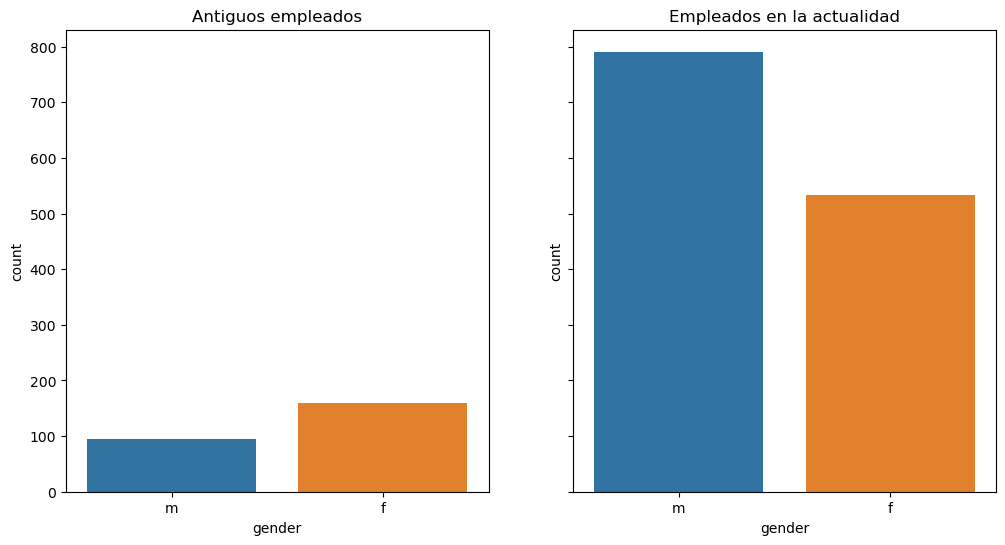

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)



# Histograma para Attrition = True
sns.countplot(data=df[df['attrition'] == True], x='gender', ax=axes[0])
axes[0].set_title('Antiguos empleados')

# Histograma para Attrition = False
sns.countplot(data=df[df['attrition'] == False], x='gender', ax=axes[1])
axes[1].set_title('Empleados en la actualidad');

In [9]:
t_cont_gender = pd.crosstab(df['attrition'], df['gender'])

t_cont_gender

gender       f    m
attrition          
False      533  791
True        95  160

In [10]:
chi2, p_value, _, _=chi2_contingency(t_cont_gender)
p_value

0.4082328152702148

p_value es mayor que 0.05 por lo que no podemos rechazar la HO: 
NO EXISTE DIFERENCIA ENTRE GRUPOS

¿EXISTE RELACIÓN ENTRE LOS EMPLEADOS QUE SIGUEN EN LA EMPRESA Y SU ESTADO CIVIL?


In [13]:
df['marital_status'].value_counts()

marital_status
married     425
single      318
divorced    196
Name: count, dtype: int64

In [30]:
solteros = df[(df['marital_status'] == 'single')| (df['marital_status'] == 'divorced')][['marital_status', 'attrition']]
casados = df[df['marital_status'] == 'married'][['marital_status', 'attrition']]

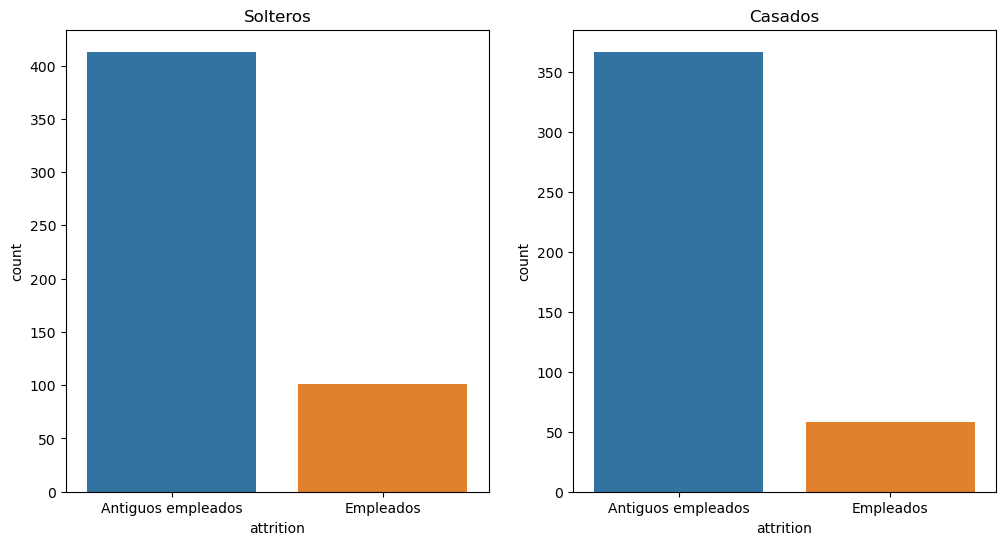

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex = True)


# Histograma para Attrition = True
sns.countplot(data= solteros, x='attrition', ax=axes[0])
axes[0].set_title('Solteros')
axes[0].set_xticklabels(['Antiguos empleados', 'Empleados'])

# Histograma para Attrition = False
sns.countplot(data= casados, x='attrition', ax=axes[1])
axes[1].set_title('Casados')
axes[1].set_xticklabels(['Antiguos empleados', 'Empleados']);

In [35]:
 df['marital_status'].value_counts()

marital_status
married     425
single      318
divorced    196
Name: count, dtype: int64

In [20]:
len(casados['attrition'])

425

In [29]:
casados['attrition'][estado]

2       False
3       False
7       False
8       False
11      False
        ...  
1583    False
1591    False
1599    False
1602     True
1608    False
Name: attrition, Length: 425, dtype: bool

In [22]:
len(solteros['attrition'][:425])

425

In [42]:
tabla_contingencia = pd.crosstab(casados['attrition'], solteros['attrition'])

tabla_contingencia

Empty DataFrame
Columns: []
Index: []

In [43]:
chi2, p_value, _, _=chi2_contingency(tabla_contingencia)
p_value

ValueError: No data; `observed` has size 0.

p_value es menor que 0.05 por lo que podemos rechazar la HO 
EXISTE DIFERENCIA ENTRE GRUPOS

In [ ]:
#a esta altura me he dado cuenta de que son 3 grupos no dos

    - years since las promotion (numerico)
    - monthly_income (numérico)

¿EXISTE RELACIÓN ENTRE LOS EMPLEADOS QUE SIGUEN EN LA EMPRESA Y SU SALARIO?


<Axes: xlabel='employee_number', ylabel='monthly_income'>

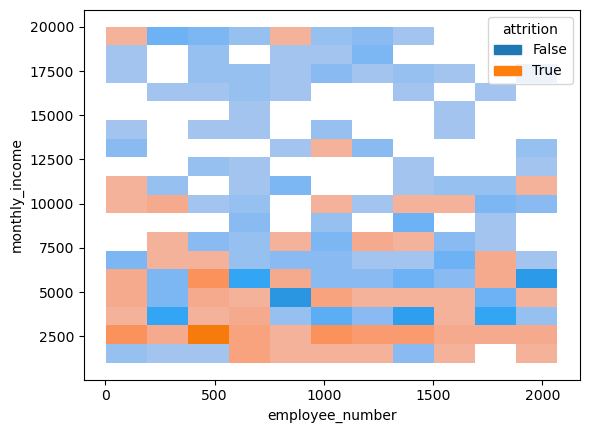

In [44]:
sns.histplot(data=df, x='employee_number', y= 'monthly_income', hue = 'attrition')

la mayoria de los trabajadores están en los sueltos bajos pero a primera vista parece que los que se han marchado (los naranjas) lo están en mayor proporción

In [45]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [46]:
normalidad(df,'monthly_income')

Para la columna monthly_income los datos siguen una distribución normal.


In [47]:
def homogeneidad (dataframe, columna, columna_metrica):
    
    """
    Evalúa la homogeneidad de las varianzas entre grupos para una métrica específica en un DataFrame dado.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna que se utilizará para dividir los datos en grupos.
    - columna_metrica (str): El nombre de la columna que se utilizará para evaluar la homogeneidad de las varianzas.

    Returns:
    No devuelve nada directamente, pero imprime en la consola si las varianzas son homogéneas o no entre los grupos.
    Se utiliza la prueba de Levene para evaluar la homogeneidad de las varianzas. Si el valor p resultante es mayor que 0.05,
    se concluye que las varianzas son homogéneas; de lo contrario, se concluye que las varianzas no son homogéneas.
    """
    
    # lo primero que tenemos que hacer es crear tantos conjuntos de datos para cada una de las categorías que tenemos, Control Campaign y Test Campaign
    valores_evaluar = []
    
    for valor in dataframe[columna].unique():
        valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])

    statistic, p_value = stats.levene(*valores_evaluar)
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")


In [48]:
homogeneidad(df,'attrition','monthly_income')

Para la métrica monthly_income, las varianzas no son homogéneas entre grupos.


al no ser homogeneas usaremos el test de mann whitney

In [51]:
df['monthly_income']

0       19537.0
1       19999.0
2       19232.0
3       17169.0
4           NaN
         ...   
1608     6725.0
1610     4447.0
1611        NaN
1612        NaN
1613    10845.0
Name: monthly_income, Length: 1579, dtype: float64

In [58]:
df1 = df.dropna(subset=['monthly_income'])

In [59]:

income_current_employees = df[df['attrition'] == False]['monthly_income']
income_former_employees = df[df['attrition'] == True]['monthly_income']

In [60]:
statistic, p_value = stats.mannwhitneyu(income_current_employees, income_former_employees)
p_value

nan

In [61]:
df.columns

Index(['attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_time',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_current_manager', 'date_birth', 'remote_work', 'grupo'],
      dtype='object')

In [64]:
df[df['remote_work'].notnull()]['remote_work'].value_counts(normalize=True) * 100

remote_work
True     51.373183
False    48.626817
Name: proportion, dtype: float64

In [67]:
df[df['attrition'] == False]['remote_work'].value_counts(normalize=True) * 100


remote_work
True     50.580271
False    49.419729
Name: proportion, dtype: float64

In [68]:
df[df['attrition'] == True]['remote_work'].value_counts(normalize=True) * 100

remote_work
True     55.392157
False    44.607843
Name: proportion, dtype: float64

In [69]:
df.head()

attrition business_travel  daily_rate              department  \
0      False             NaN       684.0                     NaN   
1      False             NaN       699.0                     NaN   
2      False          rarely       532.0  research & development   
3      False          rarely       359.0                     NaN   
4      False             NaN      1319.0                     NaN   

   distance_from_home  education   education_field  employee_number  \
0                   6          3               NaN            162.0   
1                   1          4     life sciences            259.0   
2                   4          2  technical degree            319.0   
3                   2          4           medical              NaN   
4                   3          3  technical degree              NaN   

   environment_satisfaction gender  ...  stock_option_level  \
0                       1.0      m  ...                   0   
1                       3.0      m  ...                   1   
2                       3.0      m  ...                   0   
3                       1.0      f  ...                   2   
4                       1.0      f  ...                   1   

   total_working_years  training_times_last_year work_life_balance  \
0                  NaN                         5               3.0   
1                 34.0                         5               3.0   
2                 22.0                         3               NaN   
3                  NaN                         2               NaN   
4                  NaN                         5               3.0   

   years_at_company years_since_last_promotion  years_with_current_manager  \
0                20                         15                          15   
1                33                         11                           9   
2                22                         11                          15   
3                20                          5                           6   
4                19                          2                           8   

   date_birth  remote_work     grupo  
0        1972         True   control  
1        1971         True   control  
2        1981         True   control  
3        1976        False   control  
4        1977        False  variante  

[5 rows x 33 columns]

In [70]:
df[df['remote_work'] == True]['work_life_balance'].value_counts(normalize=True) * 100

work_life_balance
3.0    63.293310
2.0    21.612350
4.0     9.433962
1.0     5.660377
Name: proportion, dtype: float64

In [71]:
df[df['remote_work'] == False]['work_life_balance'].value_counts(normalize=True) * 100

work_life_balance
3.0    60.245184
2.0    25.218914
4.0     9.281961
1.0     5.253940
Name: proportion, dtype: float64

In [73]:
df[df['remote_work'] == True]['environment_satisfaction'].value_counts(normalize=True) * 100

environment_satisfaction
3.0    31.534570
4.0    30.860034
2.0    19.392917
1.0    18.212479
Name: proportion, dtype: float64

In [74]:
df[df['remote_work'] == False]['environment_satisfaction'].value_counts(normalize=True) * 100

environment_satisfaction
3.0    31.922399
4.0    29.453263
2.0    19.400353
1.0    19.223986
Name: proportion, dtype: float64

In [75]:
df[df['remote_work'] == True]['gender'].value_counts(normalize=True) * 100

gender
m    62.735849
f    37.264151
Name: proportion, dtype: float64

In [76]:
df[df['remote_work'] == False]['gender'].value_counts(normalize=True) * 100

gender
m    58.139535
f    41.860465
Name: proportion, dtype: float64

In [77]:
df.columns

Index(['attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_time',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_current_manager', 'date_birth', 'remote_work', 'grupo'],
      dtype='object')

In [78]:
df['department'].value_counts(normalize=True) * 100

department
research & development    65.084746
sales                     29.830508
human resources            5.084746
Name: proportion, dtype: float64

In [79]:
df[df['department'] == 'research & development']['gender'].value_counts(normalize=True) * 100

gender
m    65.104167
f    34.895833
Name: proportion, dtype: float64

In [80]:
df[df['department'] == 'sales']['gender'].value_counts(normalize=True) * 100

gender
f    51.136364
m    48.863636
Name: proportion, dtype: float64

In [82]:
df[df['department'] == 'human resources']['gender'].value_counts(normalize=True) * 100

gender
m    73.333333
f    26.666667
Name: proportion, dtype: float64

In [94]:
df[df['department'] == 'research & development']['remote_work'].value_counts(normalize=True) * 100

remote_work
True     58.333333
False    41.666667
Name: proportion, dtype: float64

In [84]:
df[df['department'] == 'research & development']['environment_satisfaction'].value_counts(normalize=True) * 100 

environment_satisfaction
3.0    36.931818
4.0    25.000000
1.0    21.590909
2.0    16.477273
Name: proportion, dtype: float64

In [86]:
df[df['department'] == 'human resources']['environment_satisfaction'].value_counts(normalize=True) * 100 

environment_satisfaction
3.0    46.666667
2.0    26.666667
4.0    26.666667
Name: proportion, dtype: float64

In [87]:
df[df['department'] == 'sales']['environment_satisfaction'].value_counts(normalize=True) * 100 

environment_satisfaction
4.0    36.25
2.0    30.00
3.0    20.00
1.0    13.75
Name: proportion, dtype: float64

In [85]:
df[df['department'] == 'research & development']['training_times_last_year'].value_counts(normalize=True) * 100 

training_times_last_year
2    32.291667
3    31.250000
4    10.937500
5     8.854167
6     6.770833
1     5.729167
0     4.166667
Name: proportion, dtype: float64

In [88]:
df[df['department'] == 'sales']['training_times_last_year'].value_counts(normalize=True) 

training_times_last_year
2    42.045455
3    32.954545
4    10.227273
5     9.090909
0     2.272727
1     2.272727
6     1.136364
Name: proportion, dtype: float64

In [89]:
df[df['department'] == 'human resources']['training_times_last_year'].value_counts(normalize=True) 

training_times_last_year
2    0.400000
3    0.266667
5    0.200000
1    0.066667
4    0.066667
Name: proportion, dtype: float64

In [ ]:
df[df['department'] == 'human resources']['training_times_last_year'].value_counts(normalize=True) 

In [ ]:
df[df['job_involvement'] == '']

In [97]:
df['job_involvement'].value_counts()

job_involvement
3    930
2    400
4    161
1     88
Name: count, dtype: int64

In [98]:
df[df['attrition'] == 'False']['job_involvement'].value_counts()

Series([], Name: count, dtype: int64)

In [101]:
df[df['attrition'] == 'True']['job_involvement'].value_counts()

Series([], Name: count, dtype: int64)

In [102]:
df['department'].value_counts(normalize=True) * 100 

department
research & development    65.084746
sales                     29.830508
human resources            5.084746
Name: proportion, dtype: float64

In [103]:
df[df['attrition'] == True]['department'].value_counts(normalize=True) * 100 

department
research & development    59.574468
sales                     34.042553
human resources            6.382979
Name: proportion, dtype: float64

In [104]:
df[df['attrition'] == False]['department'].value_counts(normalize=True) * 100 

department
research & development    66.129032
sales                     29.032258
human resources            4.838710
Name: proportion, dtype: float64

In [105]:
#Analisis sobre la satisfaccion de los empleados::

SyntaxError: invalid syntax (1650421792.py, line 1)

In [ ]:

Index(['attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_time',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_current_manager', 'date_birth', 'remote_work', 'grupo'],
      dtype='object')

In [106]:
import matplotlib.pyplot as plt

In [151]:
mujeres = df[df['gender'] == 'f']
hombres = df[df['gender'] == 'm']

empleados = df[df['attrition'] == False]
antiguos_empleados = df[df['attrition'] == True]

mayor40 = df[df['date_birth'] >= 1984]
menor40 = df[df['date_birth'] < 1984]

mapeo_satisfaccion = {1: 'Nada satisfecho', 2: 'Poco satisfecho', 3: 'Satisfecho', 4: 'Muy satisfecho'}
valores_ordenados = ['Nada satisfecho', 'Poco satisfecho', 'Satisfecho', 'Muy satisfecho']
colores = ['#FF0000', '#FFCCCC', '#99FF99','#008000']


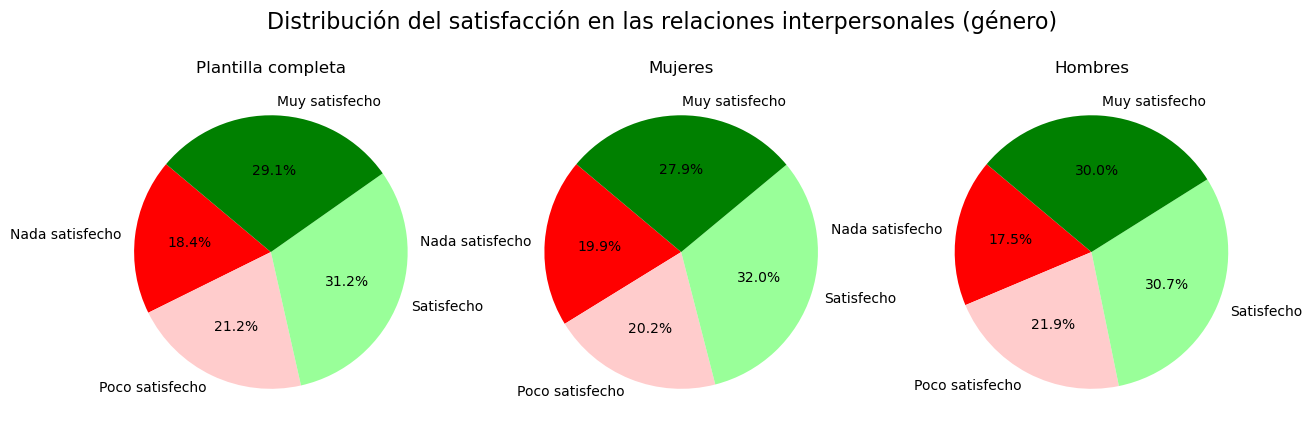

In [223]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del satisfacción en las relaciones interpersonales (género)', fontsize=16)


# Total empleados
graph = df['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

# Mujeres
graph = mujeres['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Mujeres')

# Hombres
graph = hombres['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Hombres');



<Axes: xlabel='employee_number', ylabel='monthly_income'>

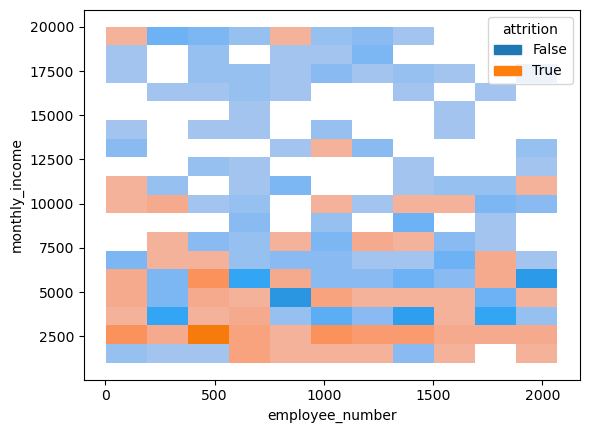

In [ ]:
sns.histplot(data=df, x='employee_number', y= 'monthly_income', hue = 'attrition')

In [224]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del satisfacción en las relaciones interpersonales (empleados antiguos / actuales)', fontsize=16)

# Total empleados
graph = df['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

# Mujeres
graph = empleados['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Empleados en la actualidad')

# Hombres
graph = antiguos_empleados['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Antiguos empleados');

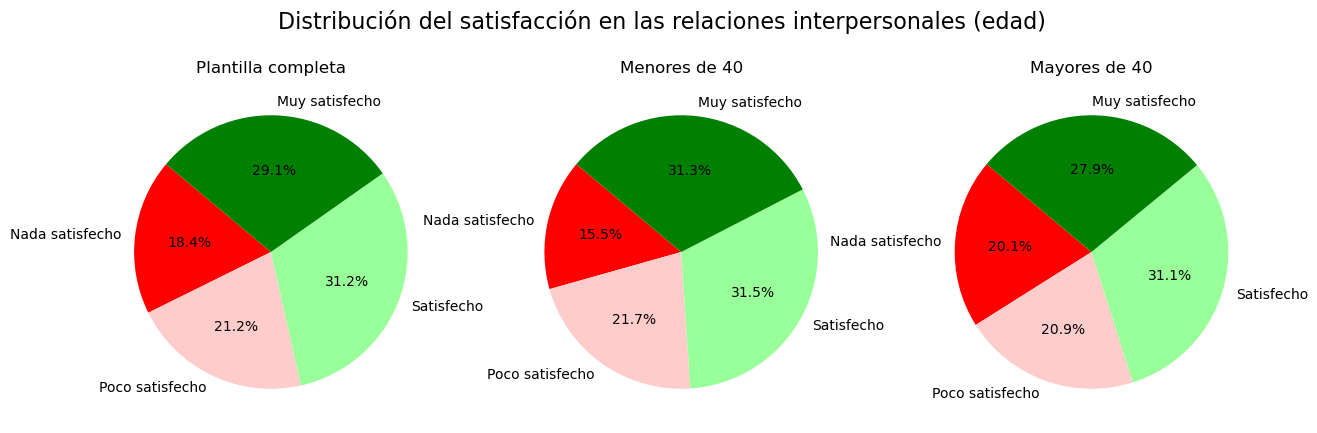

In [225]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del satisfacción en las relaciones interpersonales (edad)', fontsize=16)

# Total empleados
graph = df['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

# Mujeres
graph = menor40['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Menores de 40')

# Hombres
graph = mayor40['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Mayores de 40');

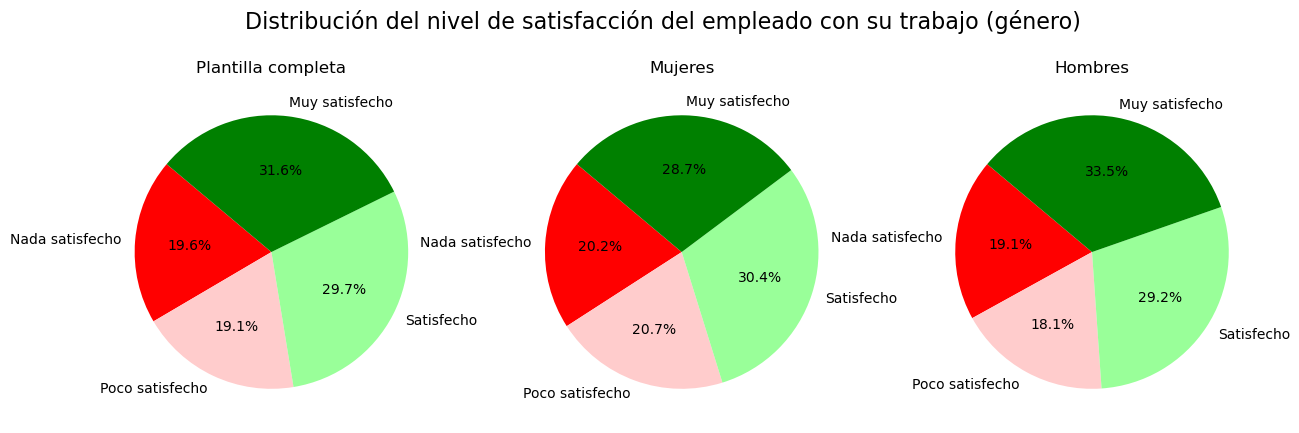

In [226]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del nivel de satisfacción del empleado con su trabajo (género)', fontsize=16)

# Total empleados
graph = df['job_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

# Mujeres
graph = mujeres['job_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Mujeres')

# Hombres
graph = hombres['job_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Hombres');

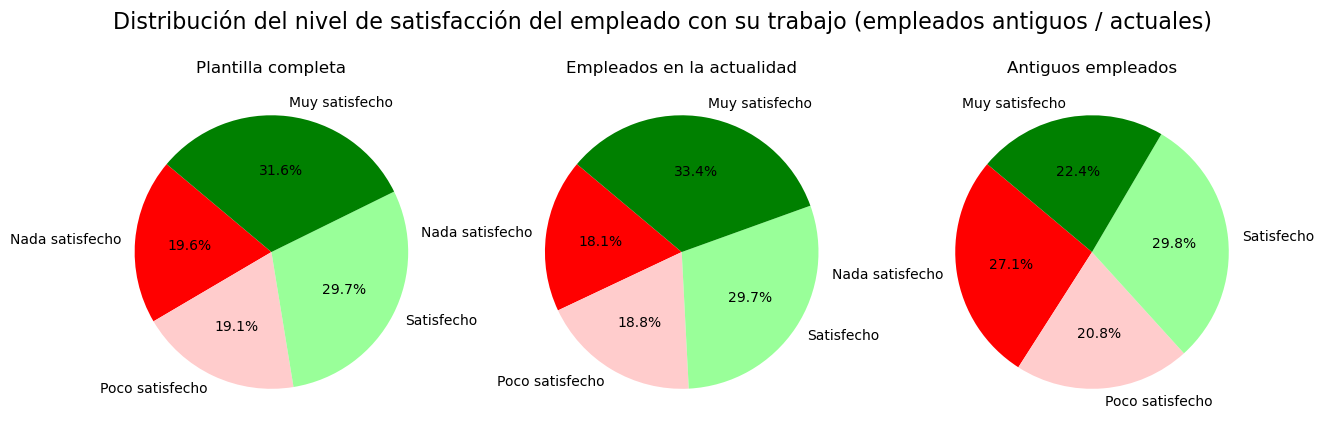

In [227]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del nivel de satisfacción del empleado con su trabajo (empleados antiguos / actuales)', fontsize=16)

# Total empleados
graph = df['job_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

# Mujeres
graph = empleados['job_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Empleados en la actualidad')

# Hombres
graph = antiguos_empleados['job_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Antiguos empleados');

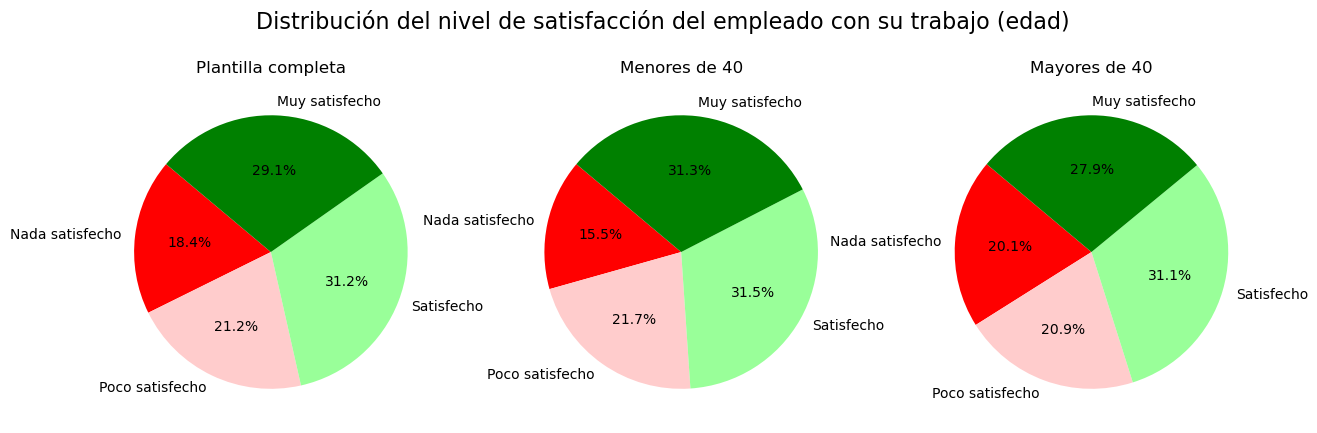

In [228]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del nivel de satisfacción del empleado con su trabajo (edad)', fontsize=16)


graph = df['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

# Mujeres
graph = menor40['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Menores de 40')

# Hombres
graph = mayor40['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Mayores de 40');

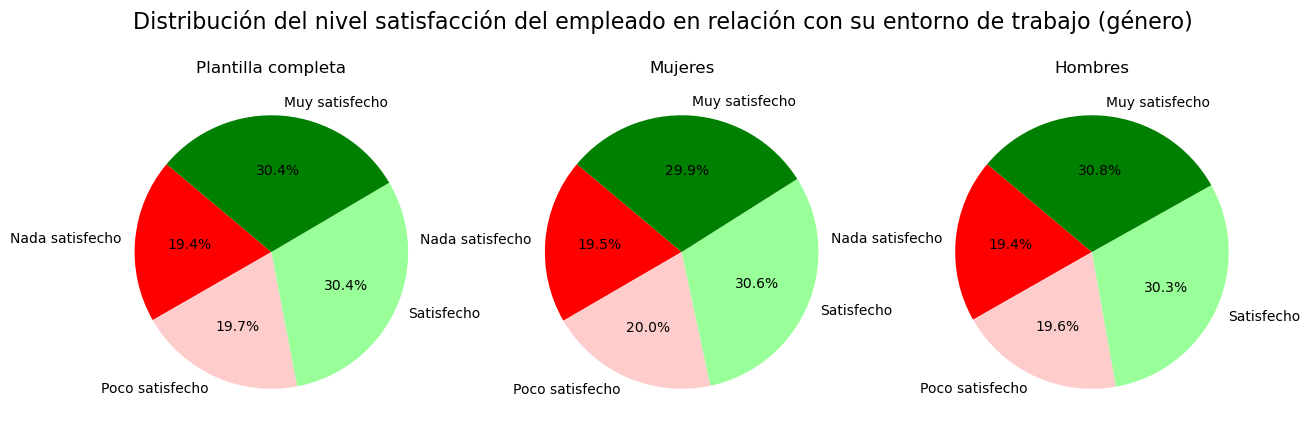

In [229]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del nivel satisfacción del empleado en relación con su entorno de trabajo (género)', fontsize=16)

# Total empleados
graph = df['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

# Mujeres
graph = mujeres['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Mujeres')

# Hombres
graph = hombres['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Hombres');

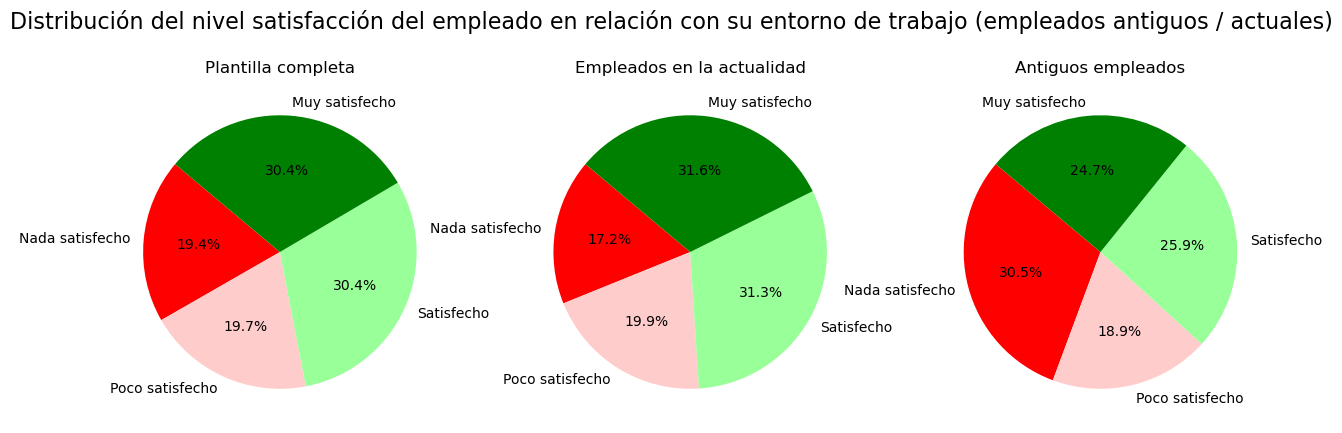

In [230]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del nivel satisfacción del empleado en relación con su entorno de trabajo (empleados antiguos / actuales)', fontsize=16)


# Total empleados
graph = df['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

# Mujeres
graph = empleados['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Empleados en la actualidad')

# Hombres
graph = antiguos_empleados['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Antiguos empleados');

In [222]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del nivel satisfacción del empleado en relación con su entorno de trabajo (edad)', fontsize=16)

# Total empleados
graph = df['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

# Mujeres
graph = menor40['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Menores de 40')

# Hombres
graph = mayor40['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Mayores de 40');

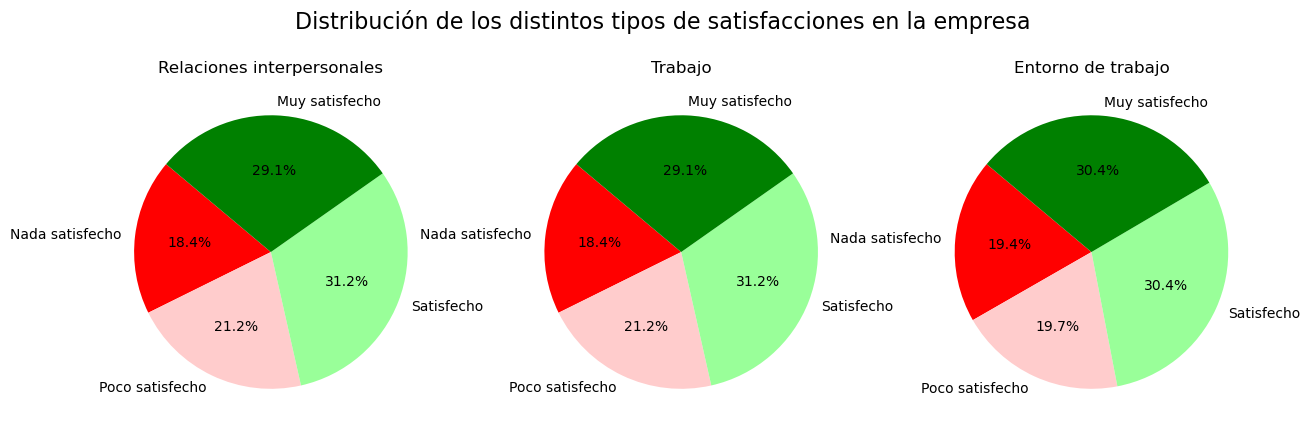

In [221]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución de los distintos tipos de satisfacciones en la empresa', fontsize=16)

# Total empleados
graph = df['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Relaciones interpersonales')

# Mujeres
graph = df['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Trabajo')


# Hombres
graph = df['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Entorno de trabajo');

## Satisfacción de los empleados:

Tras un análisis y varias visualizaciones, podemos afirmar que **se repite un patron en la satisfacción de los empleados**, tanto en tipos de satisfacción como en distinciones por diferentes grupos demográficos.

Podemos observar en el gráfico que los tres tipos de satisfacción (relaciones interpersonales, trabajo y entorno de trabajo) tienen valores parecidos en todos los niveles. **En general, alrededor del  29.5% de los empleados está muy satisfecho, 30.5% satisfecho, el 20% poco satisfecho y el 19% nada satisfecho** . Este patrón se cumple también al diferenciar los empleados por género y por edad. También muestra datos parecidos el grupo de trabajadores que ya no se encuentra en la empresa.

Cabe destacar que, aunque sea bueno que el patrón se repita y, por lo tanto, no se esté discriminando a nadie (al menos no de manera importante) en cuestiones de sexo o edad, los porcentajes no son demasiado buenos ya que, si pusieramos el límite entre poco satisfecho y satisfecho (justo en medio de la escala de satisfacción) los trabajadores se repartiría entre 60% satisfechos y 40% no satisfechos (apróximandamente) en todos los casos, dato que **podría mejorar significativamente**.


Como casos particulares destacamos: 

- Los **antiguos empleados** han tenido una satisfacción especialmente baja.
    - en cuanto al entorno de trabajo solo el 24.7 decía estar muy satisfecho frente al 30.5% que no estaba nada satisfecho.
    - en cuanto al trabajo baja a 22.4% los muy satisfechos, estando el 27.1% nada satisfecho.

- Los **mayores de 40 años** también muestran un nivel de satisfacción especialmente bajo en cuanto a la satisfaccion por el trabajo realizado y las relaciones interpersonales y se diferencian bastante de los menores de 40 en ambos ámbitos.

- Las **mujeres** están menos satisfechas que los hombres en cuanto a la satisfacción por el trabajo y en las relaciones interpersonales. Las mujeres muy satisfechas suponen el 28.7% en la satisfacción por el trabajo frente al 33.5% en los hombres y en cuanto a las relaciones interpersonales el 27.9% frente al 30.0% en los hombres.